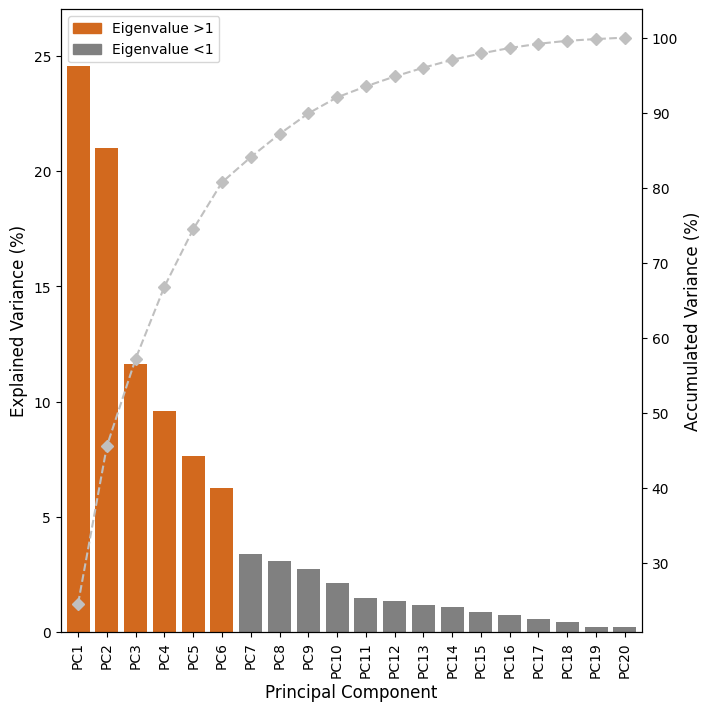

In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import git


#get the Git root location
git_repo = git.Repo('.', search_parent_directories=True)

#Get the data
df_var= pd.read_csv(f'{git_repo.working_tree_dir}\\Outputs\\PC_variance_percent.csv', index_col='Unnamed: 0') # Variance (%)
df_color = pd.read_csv(f'{git_repo.working_tree_dir}\\Outputs\\PC_eigenvalues.csv', index_col='Unnamed: 0') #eigenvalues
df_var_cumu = pd.read_csv(f'{git_repo.working_tree_dir}\\Outputs\\PC_variance_accumulation.csv', index_col='Unnamed: 0') #accumulated variance (%)

#Plot
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 7), layout='constrained')

labels = df_var.index
per_var = df_var['Explained Variance (%)'].values.tolist() 
eig_val = df_color['Eigenvalues'].values.tolist() 

plot_color = [('chocolate' if i > 1 else 'gray') for i in eig_val]

ax.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels, color=plot_color) 
ax.tick_params(axis='x', labelrotation=90, labelsize=10) 
ax.set_title('', fontsize=14)
ax.set_xlabel('Principal Component', fontsize=12)
ax.set_ylabel('Explained Variance (%)', fontsize=12)
ax.margins(0.01, 0.1)


ax2 = ax.twinx()
var_cumu = df_var_cumu['Accumulated Variance'].values.tolist()
ax2.plot(range(1, len(per_var)+1), var_cumu, color='silver', linestyle='--', marker='D')
ax2.set_ylabel('Accumulated Variance (%)', fontsize=12)  

legend_up = mpatches.Patch(color='chocolate', label='Eigenvalue >1')
legend_down = mpatches.Patch(color='gray', label='Eigenvalue <1')
ax.legend(handles=[legend_up] + [legend_down], loc='upper left')

fig.savefig(f'{git_repo.working_tree_dir}\\Outputs\\Images\\scree_plot.jpeg', dpi=300, bbox_inches='tight')

---
### PC's PLOT

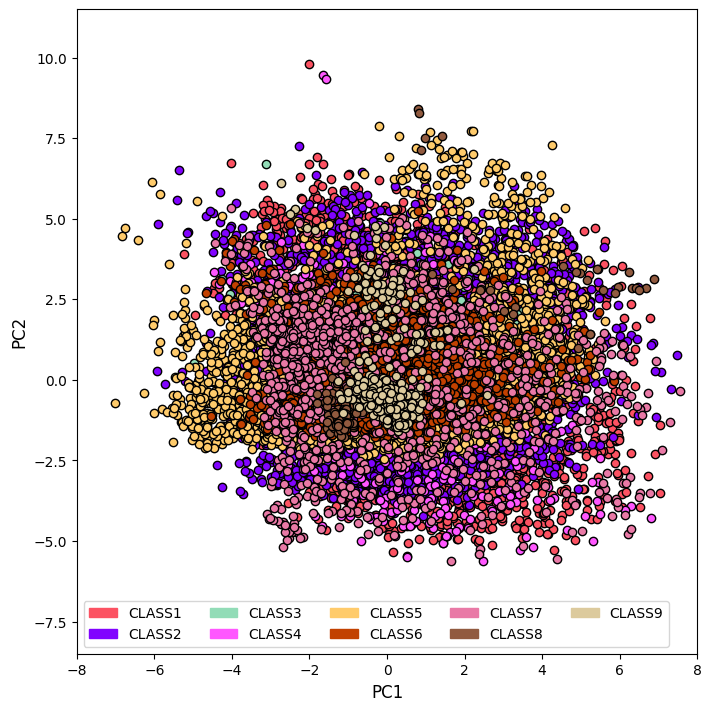

In [9]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import git


#get the Git root location
git_repo = git.Repo('.', search_parent_directories=True)

df= pd.read_csv(f'{git_repo.working_tree_dir}\\Outputs\\PCA_Result.csv', index_col='Unnamed: 0') # Variance (%)

color_configs = {
    'CLASS1': '#FC5262',
    'CLASS2': '#8103FF',
    'CLASS3': '#92DCB7',
    'CLASS4': '#FF57FF',
    'CLASS5':'#FFCB6B',
    'CLASS6': '#C24100',
    'CLASS7': '#E979A6',
    'CLASS8': '#915a3f',
    'CLASS9': '#DCCA9D',
}

CLASS_LIST = df['CLASS'].unique()

#Setting which PC's will be ploted
PC_X = 1
PC_Y = 2

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 7), layout='constrained')

for class_ in CLASS_LIST:
    df_plot = df.loc[df['CLASS'] == class_]
    x = df_plot[f'PC{PC_X}']
    y = df_plot[f'PC{PC_Y}']

    ax.scatter(x,y, label=class_, c=color_configs[class_], edgecolors="k")

ax.set_xlim(-8, 8)
ax.set_ylim(-8.5, 11.5)

ax.set_title(f'', fontsize=14)
ax.set_xlabel(f'PC{PC_X}', fontsize=12)
ax.set_ylabel(f'PC{PC_Y}', fontsize=12)


legend_patches = [mpatches.Patch(color=color, label=label) for label, color in color_configs.items()]
ax.legend(handles=legend_patches, ncol=5, loc='lower left')

fig.savefig(f'{git_repo.working_tree_dir}\\Outputs\\Images\\PC{PC_X}xPC{PC_Y}.jpeg', dpi=300, bbox_inches='tight')